In [12]:
import os
import cv2
import numpy as npP
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn as nn
import torch 
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms


In [184]:
#[0,1] <-- Dog
#[1,0] <-- Cat
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([torch.Tersor(img), label])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

.03it/s]



 89%|████████▉ | 11166/12501 [00:36<00:05, 242.78it/s]



 90%|████████▉ | 11199/12501 [00:36<00:05, 254.03it/s]



 90%|████████▉ | 11231/12501 [00:36<00:04, 267.42it/s]



 90%|█████████ | 11288/12501 [00:37<00:03, 317.46it/s]



 91%|█████████ | 11350/12501 [00:37<00:03, 359.55it/s]



 91%|█████████▏| 11411/12501 [00:37<00:02, 409.97it/s]



 92%|█████████▏| 11471/12501 [00:37<00:02, 451.77it/s]



 92%|█████████▏| 11523/12501 [00:37<00:02, 442.37it/s]



 93%|█████████▎| 11587/12501 [00:37<00:01, 486.71it/s]



 93%|█████████▎| 11652/12501 [00:37<00:01, 525.45it/s]



 94%|█████████▎| 11709/12501 [00:37<00:01, 526.35it/s]



 94%|█████████▍| 11783/12501 [00:37<00:01, 575.11it/s]



 95%|█████████▍| 11870/12501 [00:38<00:00, 638.62it/s]



 96%|█████████▌| 11956/12501 [00:38<00:00, 690.87it/s]



 96%|█████████▌| 12030/12501 [00:38<00:01, 406.09it/s]



 97%|█████████▋| 12088/12501 [00:38<00:01, 338.15it/s]



 97%|█████████▋| 12136/12501 [00:38<00:01, 328.91it/s]



 9

In [9]:
training_data = np.load('training_data.npy', allow_pickle=True)

In [10]:
print(type(training_data))

<class 'numpy.ndarray'>


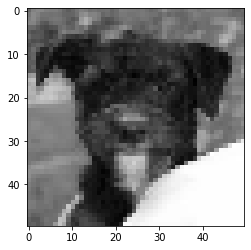

In [96]:
plt.imshow(training_data[0][0], cmap='gray')
plt.show()

In [25]:
imagem0 = training_data[0]
imagem0

array([array([[114, 138, 143, ..., 113, 111, 117],
       [128, 144, 137, ..., 116, 117, 113],
       [134, 144, 131, ..., 142, 128, 121],
       ...,
       [118, 107, 110, ..., 253, 253, 253],
       [108,  98,  98, ..., 253, 253, 253],
       [104, 107,  98, ..., 253, 253, 253]], dtype=uint8),
       array([0., 1.])], dtype=object)

In [37]:
imagem0 = imagem0[0].reshape(1,1,50,50)

In [36]:
imagem0[0].shape

(1, 50, 50)

In [72]:
# image_tensor_test = image_tensor_test.unsqueeze(0)
image_tensor_test.shape

torch.Size([1, 1, 50, 50])

(24946, 2)

In [183]:
training_data_tensor = torch.from_numpy(training_data)
data_loader = torch.utils.data.DataLoader(
    training_data_tensor,
    batch_size=10
)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [175]:
batch = next(iter(data_loader))

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found object

In [157]:
#Designing a Neural Network in PyTorch
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()

        # self.image_flattened = self.num_flat_features(_shape_image)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)  
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)

        self.fc1   = nn.Linear(64*11*11, 128)
        self.fc2   = nn.Linear(128, 64)
        self.output   = nn.Linear(64, 2)

    def forward(self, t):
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = F.relu(self.fc1(t.reshape(-1, 64*11*11)))
        t = F.relu(self.fc2(t))
        t = self.output(t)

        return F.softmax(t, dim=1)

    def num_flat_features(self, _shape_image):
        size = _shape_image[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [158]:
network = SimpleCNN()
network

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=7744, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=2, bias=True)
)

In [159]:
pred = network(image_tensor_test)
pred

tensor([[0.9246, 0.0754]], grad_fn=<SoftmaxBackward>)

In [39]:

train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=False,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [53]:
type(train_set[0][])

int

In [41]:
sample = next(iter(train_set))

In [42]:
image, label = sample

In [43]:
label

9

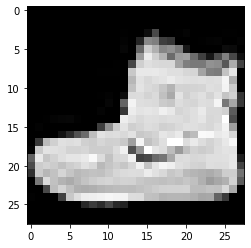

In [44]:
plt.imshow(image[0] ,cmap='gray')
plt.show()

In [66]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [88]:
net.conv1.weight.shape

torch.Size([32, 1, 3, 3])

In [22]:
for name, param in net.named_parameters():
    print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([32, 1, 3, 3])
conv1.bias 		 torch.Size([32])
conv2.weight 		 torch.Size([64, 32, 3, 3])
conv2.bias 		 torch.Size([64])
fc1.weight 		 torch.Size([128, 10816])
fc1.bias 		 torch.Size([128])
fc2.weight 		 torch.Size([2, 128])
fc2.bias 		 torch.Size([2])


In [ ]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()


In [48]:
#split data and labels

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0 #normalização
y = torch.Tensor([i[1] for i in training_data])

In [16]:
#traning data and validation data
validatation_percent = 0.2
validatation_size    = int(len(X)*validatation_percent)
print(validatation_size)

4989


In [17]:
train_X = X[:-validatation_size]
train_y = y[:-validatation_size]

test_X = X[-validatation_size:]
test_y = y[-validatation_size:]

print(len(train_X))
print(len(train_y))
print(len(test_X))
print(len(test_y))

19957
19957
4989
4989


In [49]:
BATCH_SIZE = 100 #100 imagens por iteraçao
EPOCHS     = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()
        outputs = net(batch_X)
        loss = loss_func(outputs, batch_y)
        loss.backward()
        optimizer.step()

print(loss)

0%|          | 0/200 [00:00<?, ?it/s]


NotImplementedError: 